### 데이터 불러오기

In [1]:
from PIL import Image
import os, glob 

import tensorflow as tf
from tensorflow import keras

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

### 이미지 사이즈 변경

가위 사이즈 리사이즈

In [2]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

2220  images to be resized.
2220  images resized.
가위 이미지 resize 완료!


바위 사이즈 리사이즈

In [3]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

2056  images to be resized.
2056  images resized.
바위 이미지 resize 완료!


보 사이즈 리사이즈

In [4]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

2038  images to be resized.
2038  images resized.
보 이미지 resize 완료!


In [5]:
import numpy as np

def load_data(img_path, number_of_data=6314):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0



라벨:  0


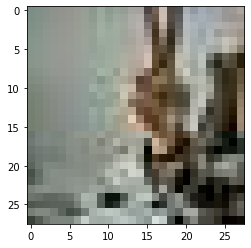

In [6]:
plt.imshow(x_train[1])
print('라벨: ', y_train[1])

### 딥러닝 네트워크 설계 ###

In [7]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                25616     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 5

## 모델 학습

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
198/198 [==============================] - 7s 15ms/step - loss: 4.0301 - accuracy: 0.4197
Epoch 2/10
198/198 [==============================] - 1s 3ms/step - loss: 0.7266 - accuracy: 0.6784
Epoch 3/10
198/198 [==============================] - 1s 3ms/step - loss: 0.4707 - accuracy: 0.8073
Epoch 4/10
198/198 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.9013
Epoch 5/10
198/198 [==============================] - 1s 3ms/step - loss: 0.2597 - accuracy: 0.9112
Epoch 6/10
198/198 [==============================] - 1s 3ms/step - loss: 0.1338 - accuracy: 0.9615
Epoch 7/10
198/198 [==============================] - 1s 3ms/step - loss: 0.1401 - accuracy: 0.9581
Epoch 8/10
198/198 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9783
Epoch 9/10
198/198 [==============================] - 1s 3ms/step - loss: 0.0546 - accuracy: 0.9834
Epoch 10/10
198/198 [==============================] - 1s 3ms/step - loss: 0.0494 - accuracy: 0.987

## 모델평가


In [10]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [11]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

104  images to be resized.
104  images resized.
바위 이미지 resize 완료!


In [12]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

55  images to be resized.
55  images resized.
보 이미지 resize 완료!


In [13]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 259)
x_test_norm = x_test/255.0

print("x_train shape: {}".format(x_test_norm.shape))
print("y_train shape: {}".format(y_test.shape))

x_train shape: (259, 28, 28, 3)
y_train shape: (259,)


In [14]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

9/9 - 1s - loss: 1.0913 - accuracy: 0.4015
test_loss: 1.091312289237976 
test_accuracy: 0.40154439210891724


model.predict() 결과 :  [0.30808038 0.36532363 0.32659596]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


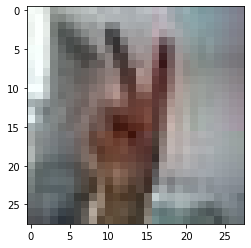

In [15]:
# 데이터를 통해 이해를 돕기 위해 대전2기 고재승님의 코드를 참고 하였습니다.


predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.3087752  0.36530542 0.32591936]
라벨: 0, 예측결과: 1


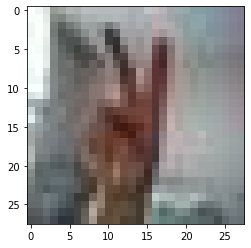

예측확률분포: [0.31374156 0.36528158 0.32097682]
라벨: 0, 예측결과: 1


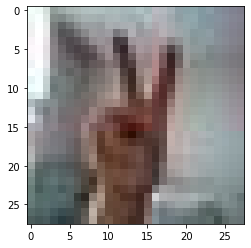

예측확률분포: [0.31139693 0.36270228 0.3259008 ]
라벨: 0, 예측결과: 1


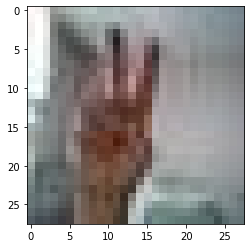

예측확률분포: [0.3111459  0.3601341  0.32871997]
라벨: 0, 예측결과: 1


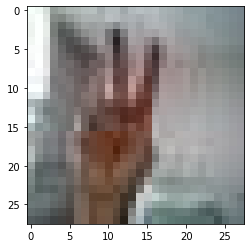

예측확률분포: [0.32187754 0.370493   0.30762947]
라벨: 2, 예측결과: 1


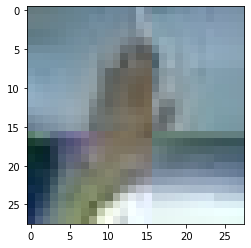

In [16]:
# 데이터를 통해 이해를 돕기 위해 대전2기 고재승님의 코드를 참고 하였습니다.

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 생각해야 할 점은 이렇습니다. 


1. 처음에는 accuracy가 너무 높게 나왔습니다. (약 0.98) 동료들의 말처럼 같은 데이터에서 같은 문제가 출제 되었기 때문이라고 생각했습니다. 

2. 그래서 테스트 세트는 학습데이터에 없는 데이터를 사용했습니다. 그랬더니 accuracy가 (약 0.12) 너무 낮게 나왔습니다. 

3. 그래서 명도가 있거나 눈으로 봐도 명확한 사진을 골라 학습데이터를 만들고 모델을 평가하니 다시 accuracy가 (약 0.68) 높게 나왔습니다.      

4. 그리고 하이퍼 파라미터를 수정해서 여러번 시도하여 accuracy를 (약 0.78) 점점 높였습니다. 하지만 Kernel에서 Clear Output을 하니 다시 acuuracy가 낮아 졌습니다. 

5. 확인해 보니 보가 아래 경계에 걸릴경우 바위로 잘못인식 할때가 많았고 바위가 경계에 걸릴경우 보로 잘못 인식하는 경우가 많았다 그리고 가위의 경우 돌려가면서 찍은 사진에서 보로 오해를 하는 경우가 있었다.

6. 더 좋은 데이터로 나눠보고 여러가지를 시도 하였지만 아직도 좋은 결과를 얻지 못했습니다. 

